# Model benchmarking, performance and settings 

The purpose of this notebook is to show how we can easly retrieve the performance and settings of the pipeline setup using build in functions of the pipeline class.

In [15]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd
import numpy as np
import keras
import sklearn
from sklearn.neural_network import MLPClassifier
import olac

from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the pipeline
We first define the pipeline as we would do usually using the following elements:
- data generator
- model
- predictor
- labeller

We then set up the pipeline, and run the it on the data using `pipeline.run()`.

In [3]:
# -- using the roving balls dataset generator
data_generator = olac.data_generators.roving_balls(steps=4000, radius=1)
# -- using the multilayer perceptron classifier from sklearn
model = MLPClassifier((63,32,))
# -- using the online predictor algorithm
predictor = olac.pipeline.OnlinePredictor(verbose=False)
# -- using a simple threshold labeller
labeller = olac.pipeline.ThresholdLabeller(threshold=20, prob=0.8, verbose=False)

# -- Define the pipeline using the above defined elements
pipeline = olac.pipeline.Pipeline(data_generator=data_generator, 
                                  model=model,
                                  predictor=predictor,
                                  labeller=labeller)


Before we run the pipeline, we can use `pipeline.describe()` to retreive the settings on each of the elements we added to the pipeline:

In [4]:
pipeline.describe()

Model:
  neural_network
  multilayer_perceptron
  MLPClassifier

Parameters:  
{ 'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (63, 32),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_iter': 200,
  'momentum': 0.9,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}

Predictor:
  pipeline
  OnlinePredictor

Parameters:  
{'verbose': False}

Labeller:
  pipeline
  ThresholdLabeller

Parameters:  
{'prob': 0.8, 'threshold': 20, 'verbose': False}

Data_generator:
  roving_balls

Generator status:  GEN_CREATED
{'balls': 2,
 'center': (0, 0),
 'period': 1000,
 'radius': 1,
 'steps': 4000,
 'vars': 1}
--------------------------------------------------------------------------------


We then run the pipeline and get the logs during training.

In [5]:
train_set, eval_set = pipeline.run()

After the pipeline has run, we can still retreive the settings that went into the pipeline. The exception to this is the settings of the data generator. Due to the nature of a generator class, after the generator is done the status changes to `CLOSED` and previous settings cannot be retreived.

In [6]:
pipeline.describe()

Model:
  neural_network
  multilayer_perceptron
  MLPClassifier

Parameters:  
{ 'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (63, 32),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_iter': 200,
  'momentum': 0.9,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}

Predictor:
  pipeline
  OnlinePredictor

Parameters:  
{'verbose': False}

Labeller:
  pipeline
  ThresholdLabeller

Parameters:  
{'prob': 0.8, 'threshold': 20, 'verbose': False}

Data_generator:
  roving_balls

Generator status:  GEN_CLOSED
{}
--------------------------------------------------------------------------------


## Performance
To gain insight into the performance of the pipeline we can use the performance function in the vis module of the olac package. This provides the user with an overview of the observed vs unobserved accuracy, precision, recall, TPR and TNR. Here, observed performance is defined as the performance one would be able to measure in production. Meaning, the perfomance indicators measured on the labelled datapoints.
Unobserver is thus the performance indicators measured on the not labelled datapoints. Ideally, we would want the performance of both the observed and unobserved to be close together so we know the observer precision is a good indicator of the actual performance of the model.

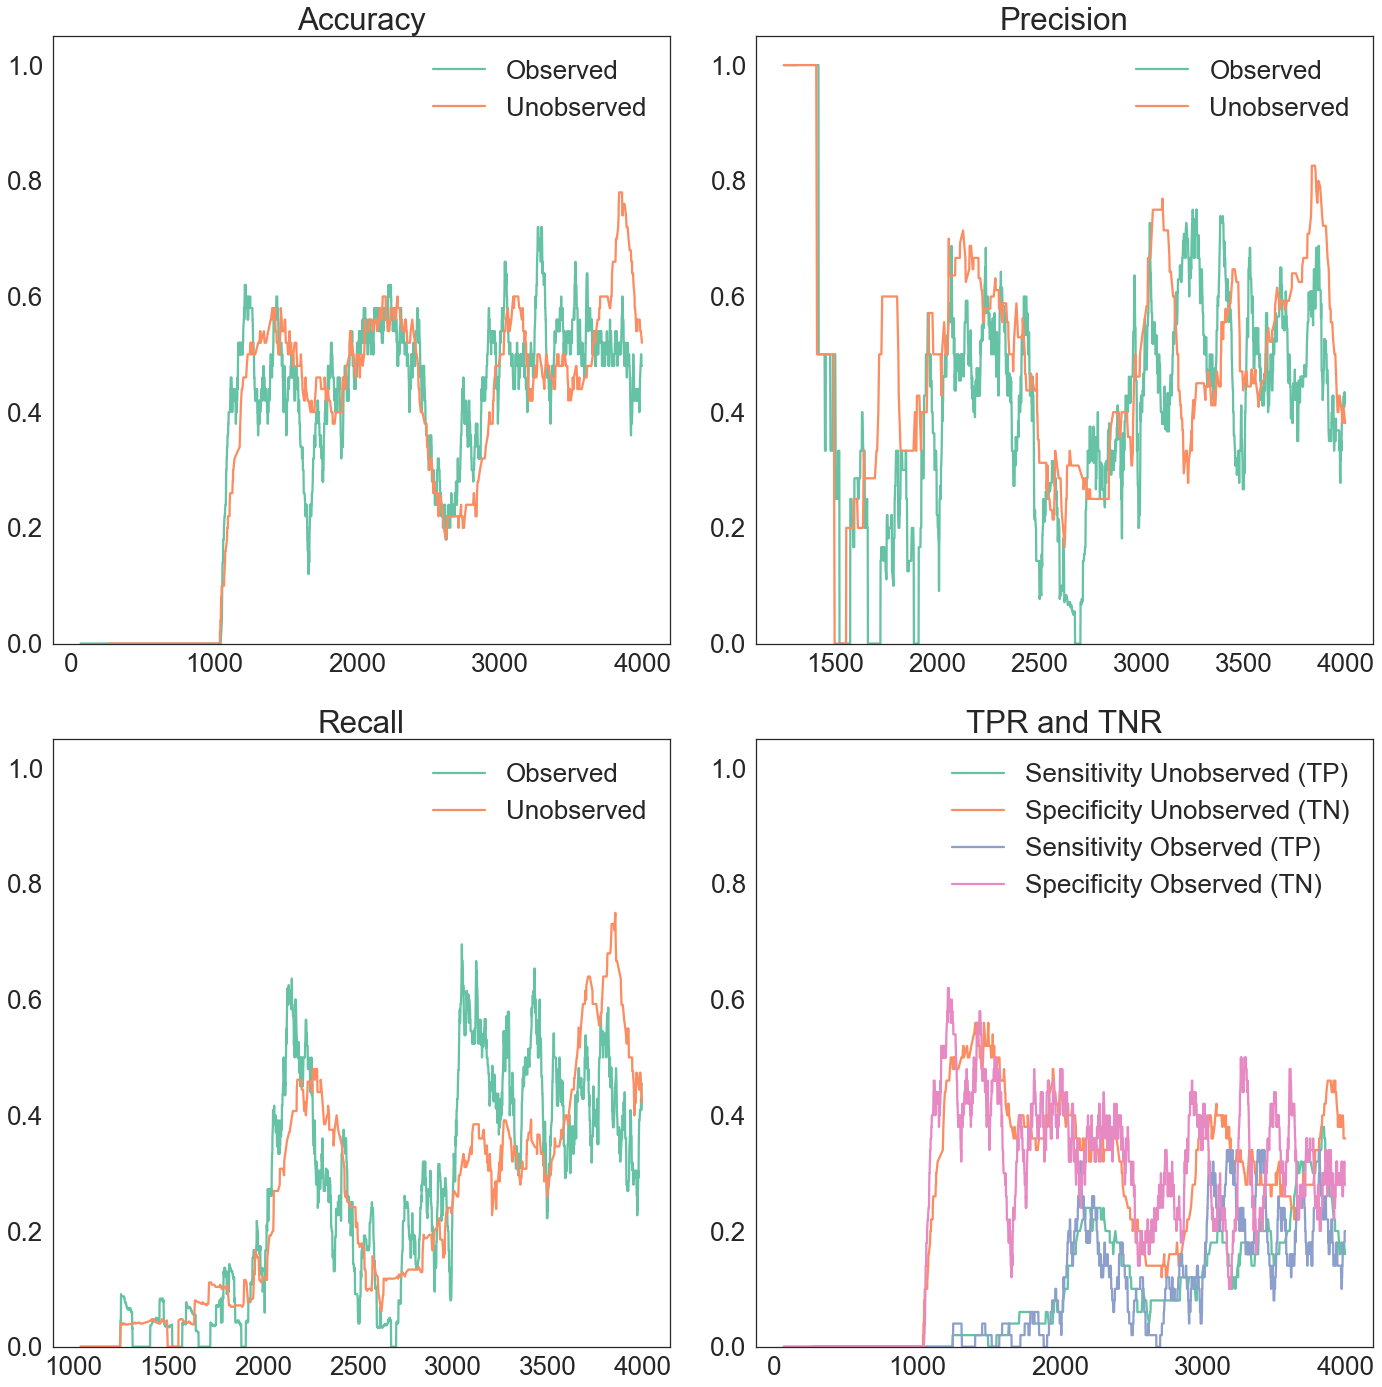

In [7]:
olac.vis.performance(eval_set, train_set, window=50)

## Comparing performance of online vs offline training

In [8]:
# -- using the roving balls dataset generator
# data_generator = olac.data_generators.roving_balls(steps=4000, radius=1)
data_generator = olac.data_generators.scaling_generator(
    olac.data_generators.cluster_generator(amount_of_labels=2, n_points=4000), 0, 1)
# -- using the multilayer perceptron classifier from sklearn
model = MLPClassifier((32,8,))
# -- using the online predictor algorithm
predictor = olac.pipeline.OnlinePredictor(verbose=False)
# -- using a simple threshold labeller
labeller = olac.pipeline.ThresholdLabeller(threshold=20, prob=0.8, verbose=False)

# -- Define the pipeline using the above defined elements
pipeline = olac.pipeline.Pipeline(data_generator=data_generator, 
                                  model=model,
                                  predictor=predictor,
                                  labeller=labeller)


In [9]:
eval_set, train_set = pipeline.run()

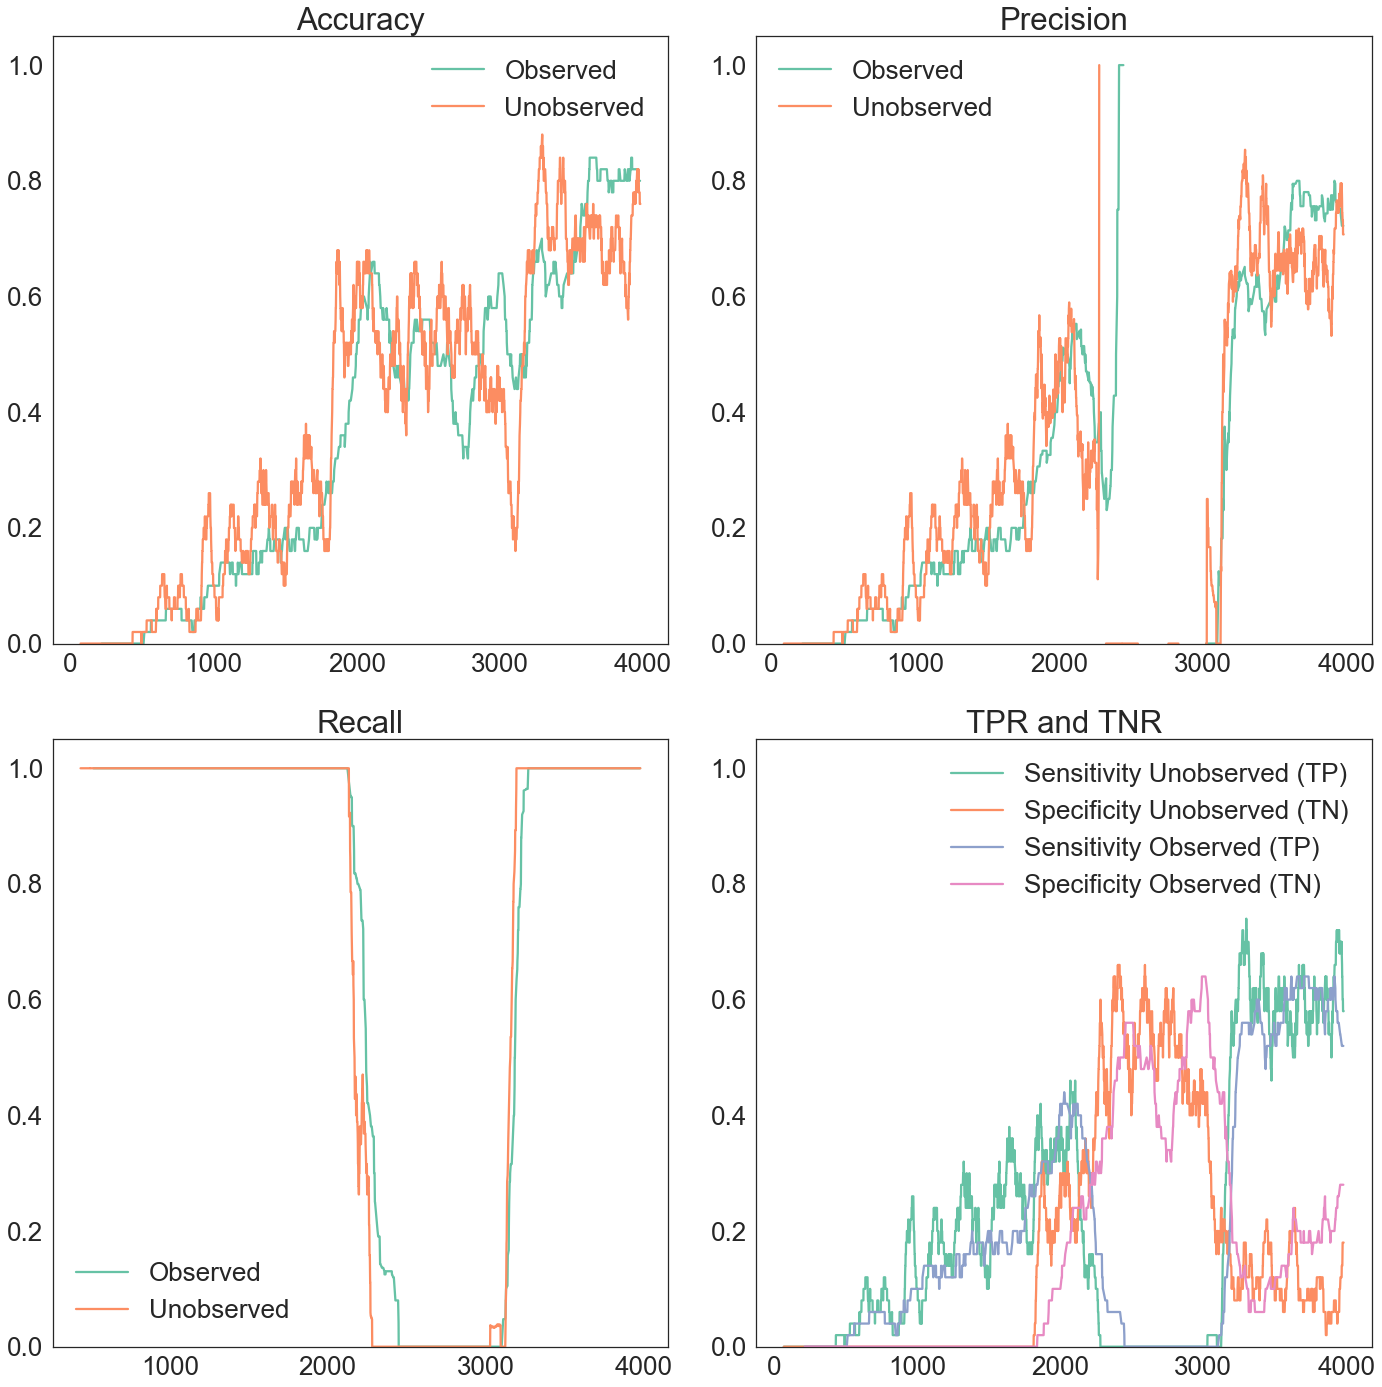

In [10]:
olac.vis.performance(eval_set, train_set, window=50)

In [11]:
# -- using the roving balls dataset generator
# data_generator = olac.data_generators.roving_balls(steps=4000, radius=1)
data_generator = olac.data_generators.scaling_generator(
    olac.data_generators.cluster_generator(amount_of_labels=2, n_points=4000), 0, 1)
# -- using the multilayer perceptron classifier from sklearn
model = MLPClassifier((32,8,))
# -- using the online predictor algorithm
predictor = olac.pipeline.OfflinePredictor(50)
# -- using a simple threshold labeller
labeller = olac.pipeline.ThresholdLabeller(threshold=20, prob=0.8, verbose=False)

# -- Define the pipeline using the above defined elements
pipeline = olac.pipeline.Pipeline(data_generator=data_generator, 
                                  model=model,
                                  predictor=predictor,
                                  labeller=labeller)


In [12]:
eval_set, train_set = pipeline.run()

Predictor:	204 new points available, Adding to history...
Predictor: 204 points added to history.
Predictor: Trained model on 204 points
Predictor:	52 new points available, Adding to history...
Predictor: 52 points added to history.
.                   Total nr of points: 256
Predictor: Trained model on 256 points
Predictor:	98 new points available, Adding to history...
Predictor: 98 points added to history.
.                   Total nr of points: 354
Predictor: Trained model on 354 points
Predictor:	143 new points available, Adding to history...
Predictor: 143 points added to history.
.                   Total nr of points: 497
Predictor: Trained model on 497 points
Predictor:	50 new points available, Adding to history...
Predictor: 50 points added to history.
.                   Total nr of points: 547
Predictor: Trained model on 547 points
Predictor:	60 new points available, Adding to history...
Predictor: 60 points added to history.
.                   Total nr of points: 607
Predi

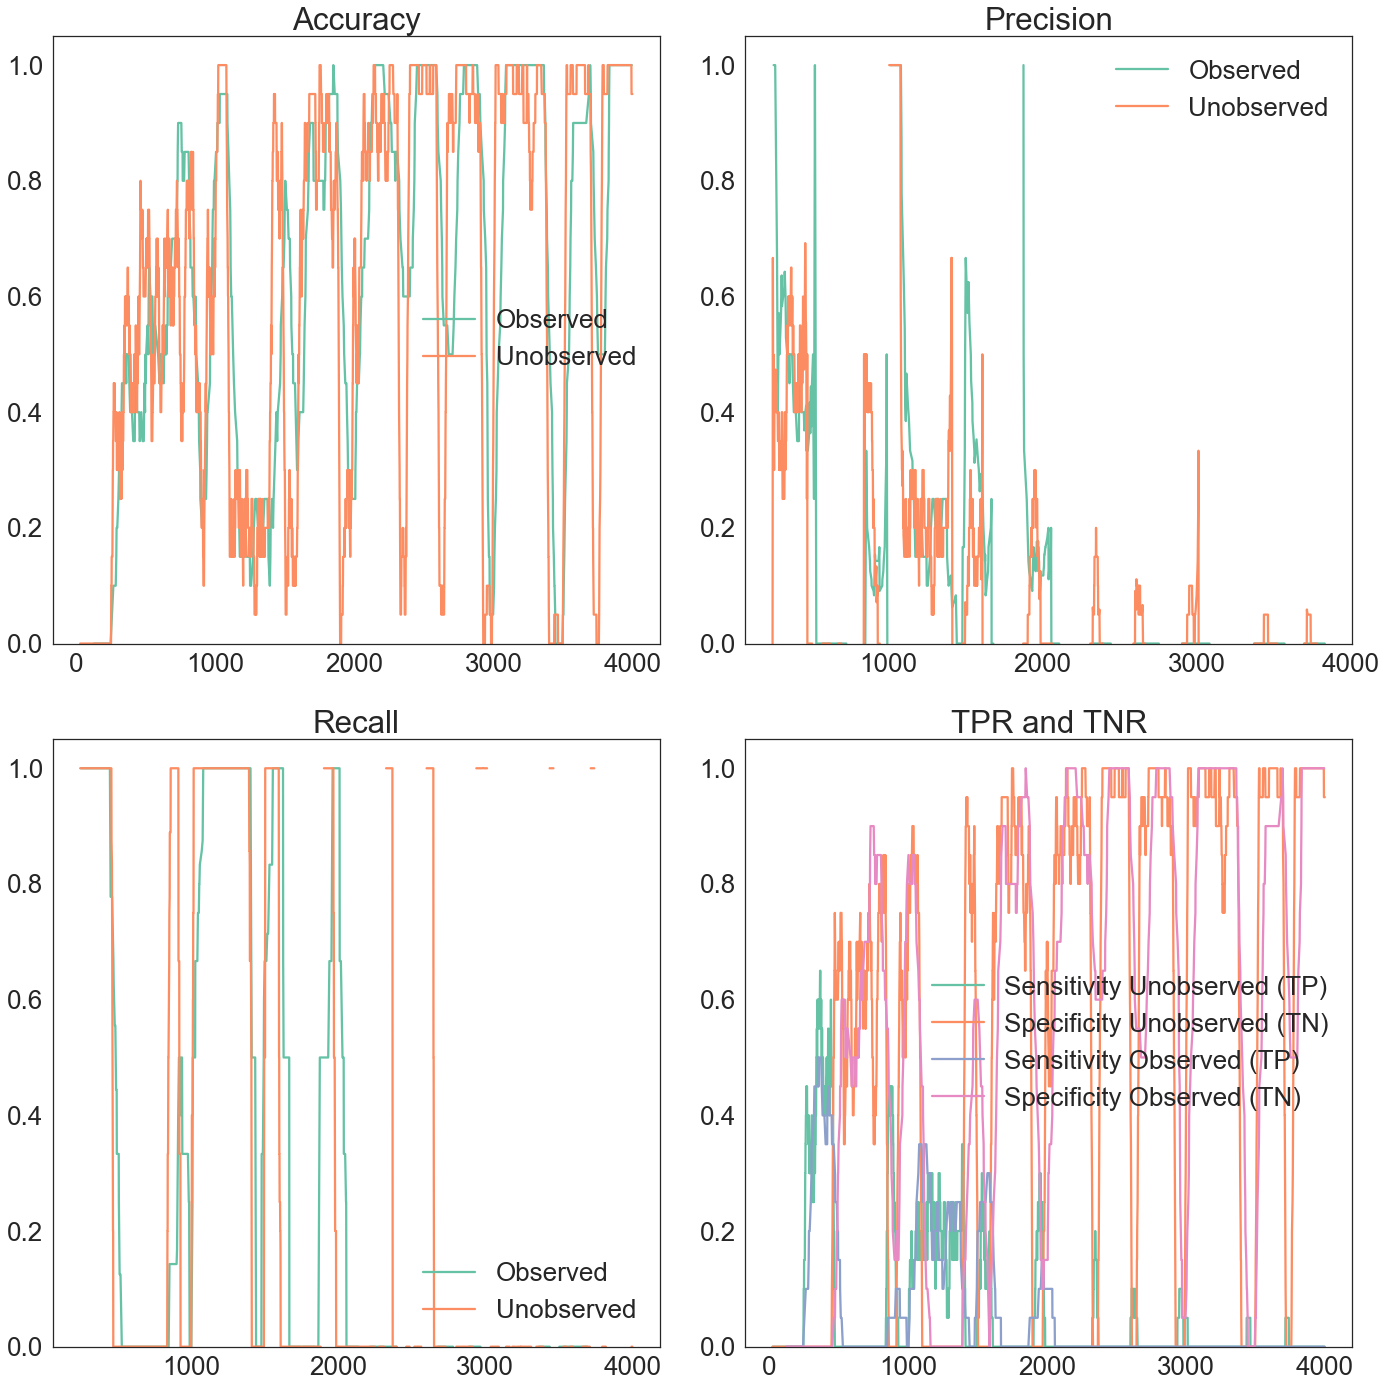

In [13]:
olac.vis.performance(eval_set, train_set, window=20)

In [20]:
import antigravity